Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
ny_coordinates = [[ -74.25559, -73.70001],[40.91553, 40.49612]]
NY_west = ny_coordinates[0][0]
NY_east = ny_coordinates[0][1]
NY_north = ny_coordinates[1][0]
NY_south =  ny_coordinates[1][1]

In [3]:
#ny_rect_ = [abs(ny_rect[0][0]-ny_rect[0][1]), abs(ny_rect[1][0]-ny_rect[1][1])]

Загрузка данных и координат Нью-Йорка

In [4]:
data16_05 = pd.read_csv('yellow_tripdata_2016-05.csv')
data16_05.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [5]:
data16_05['tpep_pickup_datetime'] = pd.to_datetime(data16_05['tpep_pickup_datetime'])
data16_05['tpep_dropoff_datetime']= pd.to_datetime(data16_05['tpep_dropoff_datetime'])

In [6]:
data16_05

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836848,2,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
11836849,2,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
11836850,2,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,28.5,0.5,0.5,0.00,0.0,0.3,29.80
11836851,2,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


Описание данных

In [7]:
data16_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RatecodeID             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

In [8]:
regions = pd.read_csv('regions.csv', sep=';')
regions

,region,west,east,south,north
0,1,-74.255590,-74.244478,40.496120,40.504508
1,2,-74.255590,-74.244478,40.504508,40.512896
2,3,-74.255590,-74.244478,40.512896,40.521285
3,4,-74.255590,-74.244478,40.521285,40.529673
4,5,-74.255590,-74.244478,40.529673,40.538061
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


In [9]:
data = pd.read_csv('yellow_tripdata_2016-05.csv',
                    usecols=['tpep_pickup_datetime',
                           'tpep_dropoff_datetime',
                           'passenger_count',
                           'trip_distance',
                           'pickup_longitude',
                           'pickup_latitude'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

Удаляем:
-нулевой длительностью
-нулевым количеством пассажиров
-нулевым расстоянием поездки по счётчику
-координатами начала, не попадающими в прямоугольник Нью-Йорка

In [10]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040
1,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751
2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573
3,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601
4,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192
...,...,...,...,...,...,...
11836848,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.00,0.000000,0.000000
11836849,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.00,0.000000,0.000000
11836850,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.00,0.000000,0.000000
11836851,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.00,0.000000,0.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   pickup_longitude       float64       
 5   pickup_latitude        float64       
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 541.8 MB


In [12]:
data_ = data[((data.tpep_dropoff_datetime - data.tpep_pickup_datetime) > datetime.timedelta(0)) 
                 & (data.passenger_count > 0 ) 
                 & (data.trip_distance > 0) 
                 & (data.pickup_latitude < NY_north) 
                 & (data.pickup_latitude > NY_south) 
                 & (data.pickup_longitude < NY_east) 
                 & (data.pickup_longitude > NY_west)
                ]

In [13]:
data_

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040
1,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751
2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573
3,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601
4,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192
...,...,...,...,...,...,...
11836837,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818
11836838,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942
11836839,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723
11836840,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862


In [14]:
len(data_)

11626521

In [15]:
data_.drop(['tpep_dropoff_datetime'], axis =1, inplace=True)
#data_.drop(['passenger_count'], axis =1, inplace=True)
data_.drop(['trip_distance'], axis =1, inplace=True)

In [16]:
data_.head()

,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude
0,2016-05-01,1,-73.985901,40.768040
1,2016-05-01,1,-73.991577,40.744751
2,2016-05-01,6,-73.993073,40.741573
3,2016-05-01,1,-73.991943,40.684601
4,2016-05-01,1,-74.005280,40.740192


Оставляем часы в pickup time

In [17]:
data_['tpep_pickup_datetime'] = data_['tpep_pickup_datetime'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))
data_

,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude
0,2016-05-01 00:00:00,1,-73.985901,40.768040
1,2016-05-01 00:00:00,1,-73.991577,40.744751
2,2016-05-01 00:00:00,6,-73.993073,40.741573
3,2016-05-01 00:00:00,1,-73.991943,40.684601
4,2016-05-01 00:00:00,1,-74.005280,40.740192
...,...,...,...,...
11836837,2016-05-31 23:00:00,2,-73.947876,40.774818
11836838,2016-05-31 23:00:00,1,-73.789467,40.646942
11836839,2016-05-31 23:00:00,1,-74.008659,40.719723
11836840,2016-05-31 23:00:00,1,-73.981644,40.758862


In [18]:
#function for finding long-latit region
def reg_l_l(reg_data, data):
    print(data)
    return((reg_data.north >= data.pickup_latitude)& # Ю или равен С
          (reg_data.south <= data.pickup_latitude)&  # С или равен Ю
          (reg_data.west  <= data.pickup_longitude)& # В или равен З
          (reg_data.east  >=  data.pickup_longitude))# З или равен В

In [19]:
# Вызываю регионы и внутри функцию со строкой, которую хочу определить. 
# Далее столбец и значение, которое хочу вернуть
regions[reg_l_l(regions, data.iloc[0])].region.values[0]

tpep_pickup_datetime     2016-05-01 00:00:00
tpep_dropoff_datetime    2016-05-01 00:17:31
passenger_count                            1
trip_distance                            3.6
pickup_longitude                    -73.9859
pickup_latitude                       40.768
Name: 0, dtype: object


1233

In [20]:
# делим сектора
def long(val, west, east):
#     return(abs(np.ceil(((val-west)*50)/(east-west))))
    return(np.ceil(((val-west)*50)/(east-west)))
def lat(val, north, south):
#     return(abs(np.ceil(((val-south)*50)/(north-south))))
    return(np.ceil(((val-south)*50)/(north-south)))
def sector(latitude, longitude, north, south, east, west):
    return((long(longitude, west, east) -1)*50 + lat(latitude, north, south))

In [21]:
long(data_.iloc[0].pickup_longitude, NY_west, NY_east)

25.0

In [22]:
lat(data_.iloc[0].pickup_latitude, NY_north, NY_south)

33.0

In [23]:
print(sector(data_.iloc[0].pickup_latitude, data_.iloc[0].pickup_longitude,
       NY_north, NY_south, NY_east, NY_west ))

1233.0


In [24]:
assert regions[reg_l_l(regions, data.iloc[0])].region.values[0] == sector(data_.iloc[0].pickup_latitude, data_.iloc[0].pickup_longitude, NY_north, NY_south, NY_east, NY_west),'Result from *finding sector* function isn`t equal'
print('Checking complete. All is ok.')

tpep_pickup_datetime     2016-05-01 00:00:00
tpep_dropoff_datetime    2016-05-01 00:17:31
passenger_count                            1
trip_distance                            3.6
pickup_longitude                    -73.9859
pickup_latitude                       40.768
Name: 0, dtype: object
Checking complete. All is ok.


Находим регионы и добавляет во фрейм

In [25]:
sect = sector(data_.pickup_latitude, data_.pickup_longitude, NY_north, NY_south, NY_east, NY_west)

In [26]:
for i in sect:
    if i > 2500:
        print('fail code 2500+')
print(len(sect))
print(len(data_))

11626521
11626521


In [27]:
data_['region'] = sect

In [28]:
data_.head()

,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,region
0,2016-05-01,1,-73.985901,40.768040,1233.0
1,2016-05-01,1,-73.991577,40.744751,1180.0
2,2016-05-01,6,-73.993073,40.741573,1180.0
3,2016-05-01,1,-73.991943,40.684601,1173.0
4,2016-05-01,1,-74.005280,40.740192,1130.0


Агрегируем данные за май 2016 года по часам и областям 

In [29]:
data_['longitude_region'] = long(data_.pickup_longitude,NY_west,NY_east)
data_['latitude_region']  = long(data_.pickup_latitude,NY_north,NY_south)

In [30]:
data_['timestamp'] = data_.tpep_pickup_datetime.apply(lambda x: x.value)

In [31]:
data_

,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,region,longitude_region,latitude_region,timestamp
0,2016-05-01 00:00:00,1,-73.985901,40.768040,1233.0,25.0,18.0,1462060800000000000
1,2016-05-01 00:00:00,1,-73.991577,40.744751,1180.0,24.0,21.0,1462060800000000000
2,2016-05-01 00:00:00,6,-73.993073,40.741573,1180.0,24.0,21.0,1462060800000000000
3,2016-05-01 00:00:00,1,-73.991943,40.684601,1173.0,24.0,28.0,1462060800000000000
4,2016-05-01 00:00:00,1,-74.005280,40.740192,1130.0,23.0,21.0,1462060800000000000
...,...,...,...,...,...,...,...,...
11836837,2016-05-31 23:00:00,2,-73.947876,40.774818,1384.0,28.0,17.0,1464735600000000000
11836838,2016-05-31 23:00:00,1,-73.789467,40.646942,2068.0,42.0,33.0,1464735600000000000
11836839,2016-05-31 23:00:00,1,-74.008659,40.719723,1127.0,23.0,24.0,1464735600000000000
11836840,2016-05-31 23:00:00,1,-73.981644,40.758862,1232.0,25.0,19.0,1464735600000000000


In [32]:
time = np.sort(data_.timestamp.unique())
time = np.hstack((time, time[-1] + data_.timestamp[0]))
time = np.hstack((time[0]-3600000000000, time))

In [33]:
time[:10]

array([1462057200000000000, 1462060800000000000, 1462064400000000000,
       1462068000000000000, 1462071600000000000, 1462075200000000000,
       1462078800000000000, 1462082400000000000, 1462086000000000000,
       1462089600000000000], dtype=int64)

In [34]:
time.shape

(746,)

Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

In [35]:
ag_ = stats.binned_statistic_2d( data_.region,data_.timestamp, data_.passenger_count,
                                'count', bins=[np.arange(1,2502), time])


In [36]:
ag_1= stats.binned_statistic_2d(data_.timestamp, data_.region, data_.passenger_count, 'sum',
                               bins=[np.arange(1,2502), time])

In [37]:
from scipy import stats as sts

In [38]:
ag_1.statistic.shape

(2500, 745)

In [39]:
np.unique(ag_1.statistic.ravel(), return_counts=True, return_index=True)

(array([0.]), array([0], dtype=int64), array([1862500], dtype=int64))

In [40]:
np.unique(ag_.statistic.ravel(), return_counts=True, return_index=True)

(array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.078e+03, 2.145e+03,
        2.206e+03]),
 array([     0,  10900,  23517, ..., 954438, 954413, 954414], dtype=int64),
 array([1720738,   39318,   15074, ...,       1,       1,       1],
       dtype=int64))

In [41]:
print(np.unique(ag_.statistic[:10]))

[0.]


По вышепреведенной строке полученной таблицы можно понять, что поездок в первых регионах не было

In [42]:
# heatmap виснет, хотя вроде функция данной библиотеки
# plt.figure(figsize=(15,15))
# sns.heatmap(ag_1.statistic[::], annot=True)

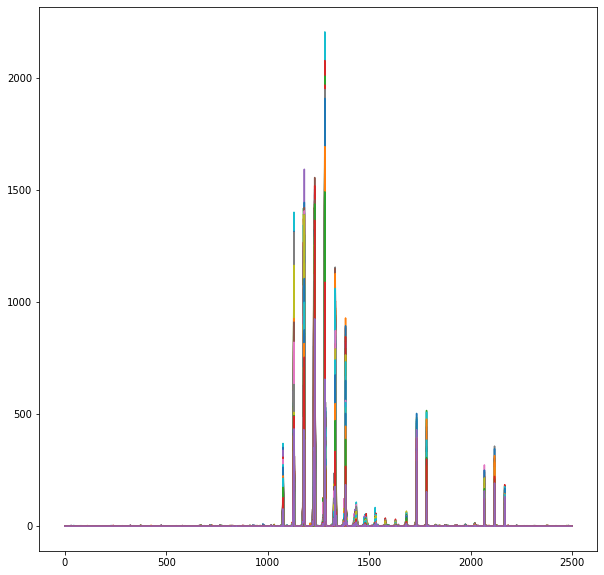

In [43]:
plt.figure(figsize=(10,10))
plt.plot(ag_.statistic[::])
plt.show()

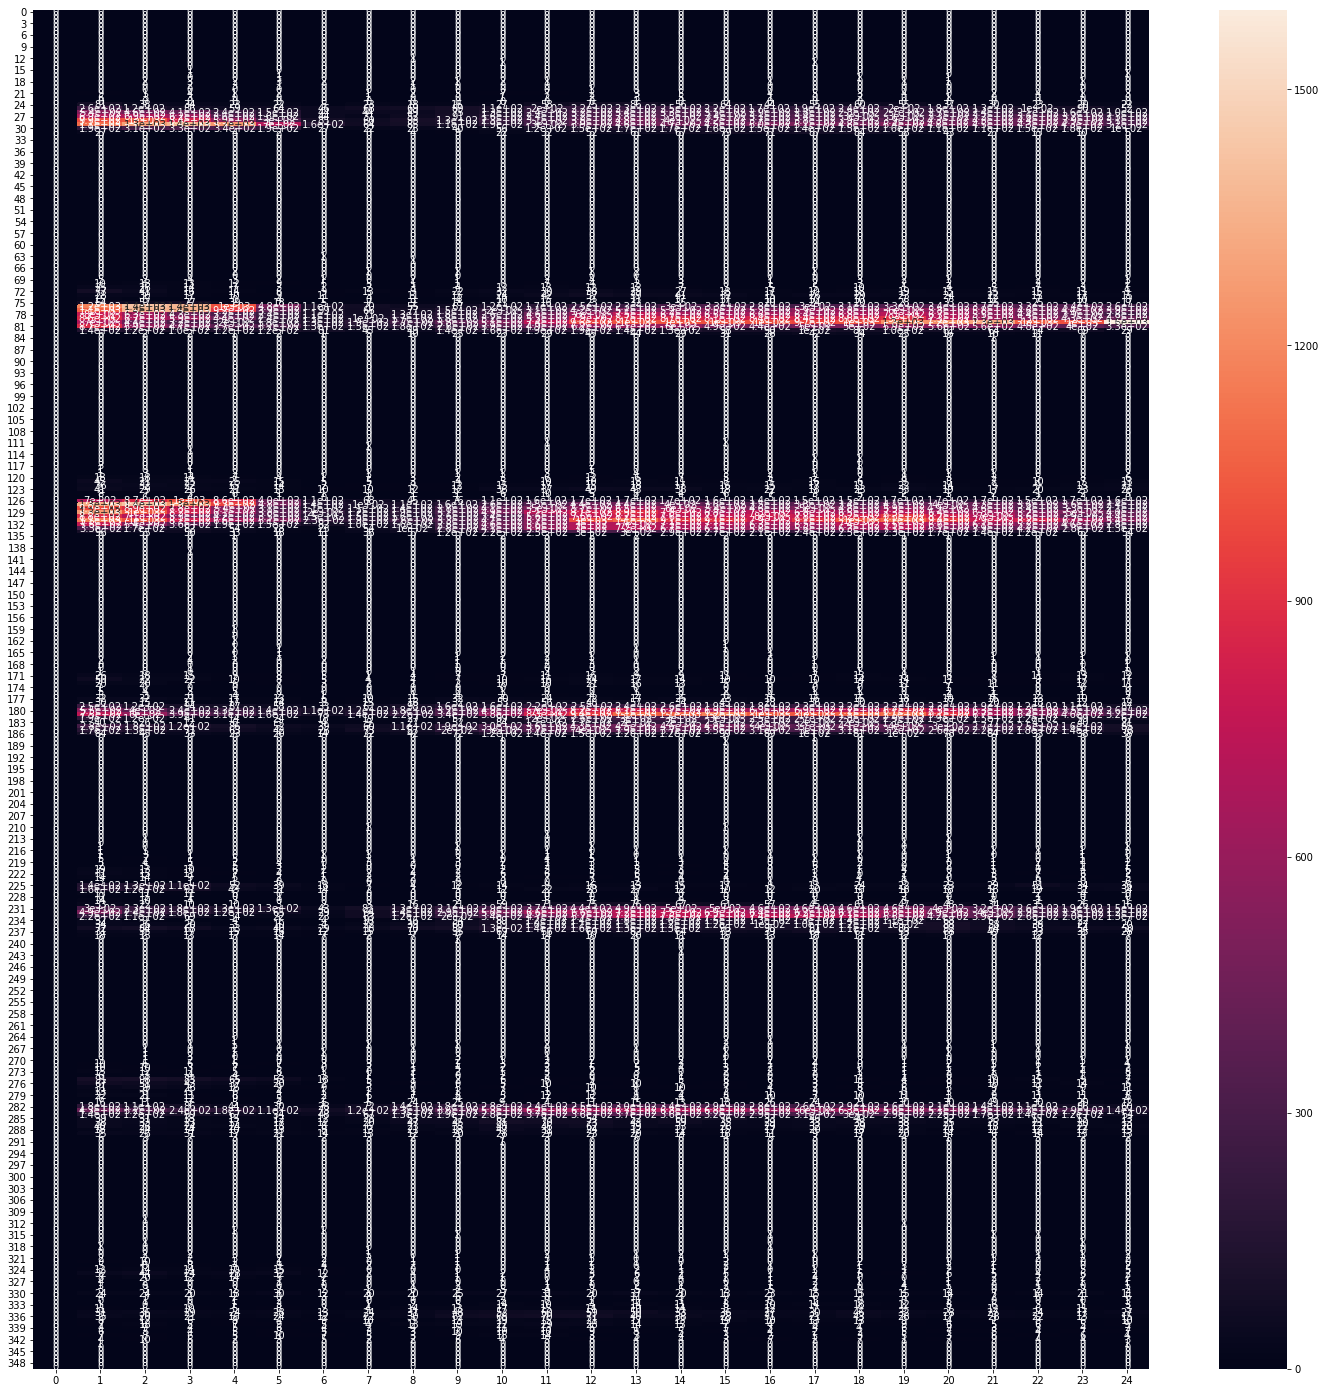

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(ag_.statistic[1100:1450,:25], annot=True)
plt.show()

Видим пиковые нагрузки для секторов с ~1200 по ~1400 и двумя пиками в ~1750 и ~2050 по plot и heatmap в 25 день показывает, что есть области, в которых вообще не было поездок, а есть с высокой загрузкой. Далее подробнее будет heatmap

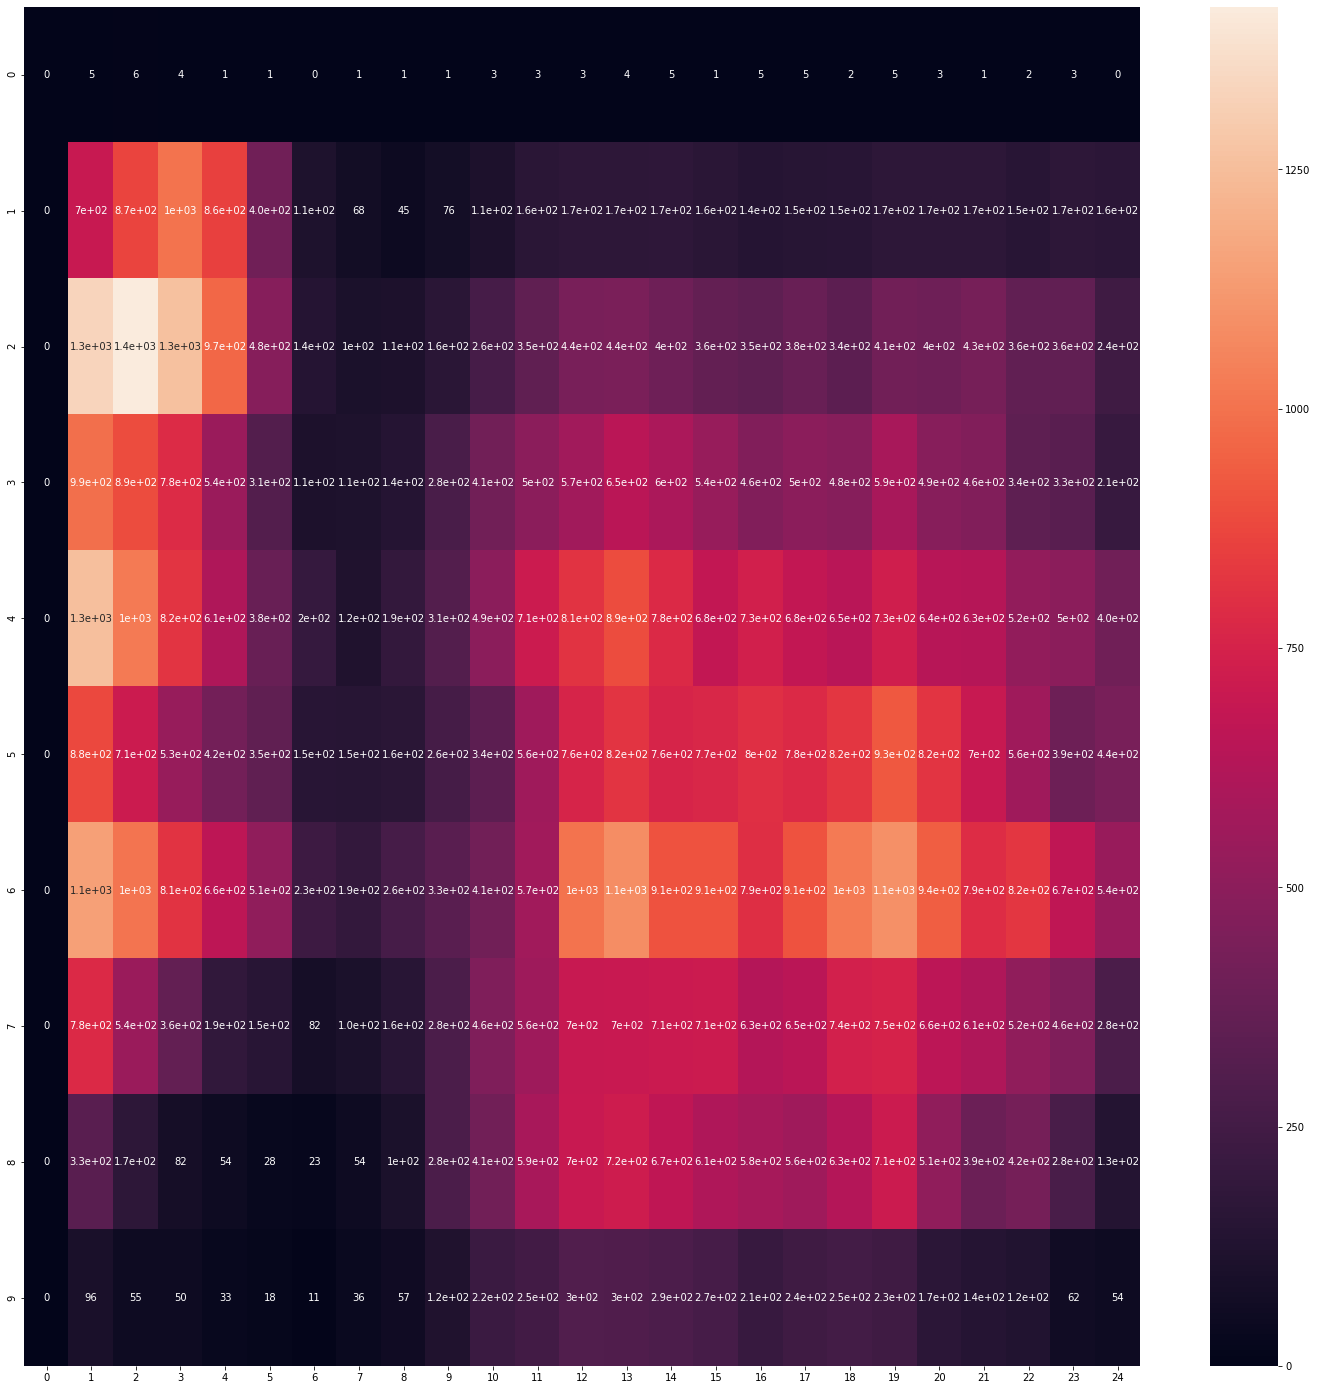

In [45]:
plt.figure(figsize=(25,25))
sns.heatmap(ag_.statistic[1225:1235,:25], annot=True)
plt.show()

Постройка графика количества поездок жёлтого такси из ячейки, содержащей Empire State Building. Координаты ESB взяты с сайта:
https://www.gps-latitude-longitude.com/gps-coordinates-of-empire-state-building-new-york

In [46]:
#Longitude of Empire State Building New York: -73.985664
#Latitude of Empire State Building New York: 40.748441
ESB_long = -73.985664
ESB_lat  =  40.748441

In [47]:
ESB_reg = int(sector(ESB_lat, ESB_long, NY_north, NY_south, NY_east, NY_west))
print(ESB_reg)
print(ag_.statistic.shape)

1231
(2500, 745)


In [48]:
print(ag_.statistic[ESB_reg-1:,:743])

[[   0.  881.  713. ... 1094.  997. 1099.]
 [   0. 1143. 1005. ... 1092. 1170. 1438.]
 [   0.  780.  545. ...  789.  722.  685.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


Text(0.5, 1.0, 'EMPIRE STATE BUILDING REGION GRAPH')

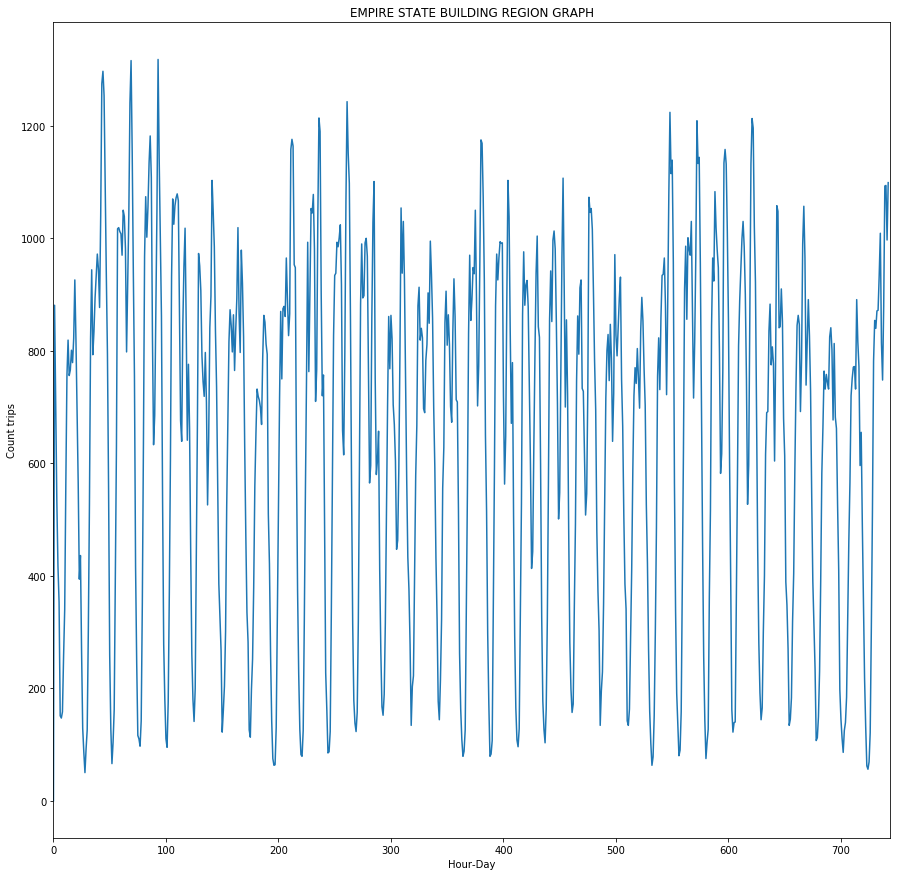

In [49]:
plt.figure(figsize=(15,15))
plt.plot(np.arange(743), ag_.statistic[ESB_reg-1,:743])
#plt.plot(np.arange(743), ag_1.statistic[ESB_reg-1,:743])
plt.xlim([0,744])
plt.xlabel('Hour-Day')
plt.ylabel('Count trips')
plt.title('EMPIRE STATE BUILDING REGION GRAPH')

Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки. 


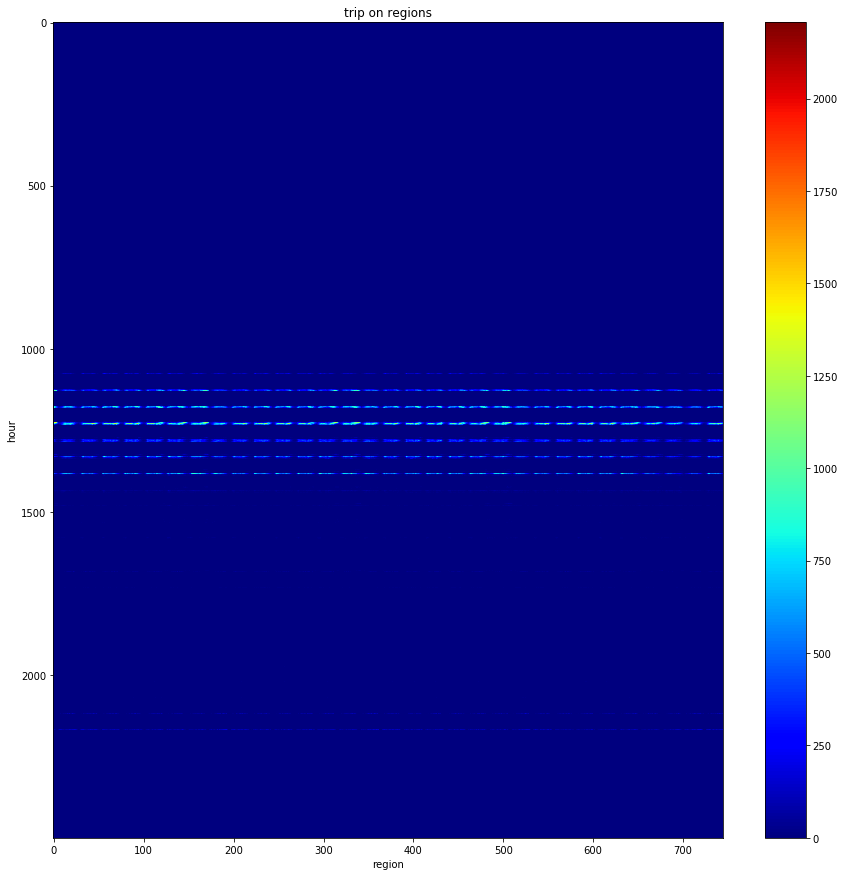

In [50]:
plt.figure(figsize=(15,15))
img = plt.imshow(ag_.statistic, interpolation='nearest')
img.set_cmap('jet')
plt.title('trip on regions')
plt.xlabel('region')
plt.ylabel('hour')
plt.axes().set_aspect('auto')
plt.colorbar()

Имеется около 10 самых нагруженных регионов

In [51]:
np.unique(ag_1.statistic.ravel(), return_counts=True)

(array([0.]), array([1862500], dtype=int64))

1861010 получили ячейки(день-час, регион), в которых не было поездок  мае

In [52]:
with open('ag_.pkl','wb') as fid:
    pickle.dump(ag_.statistic, fid)
with open('ag_1.pkl','wb') as fid:
    pickle.dump(ag_1.statistic, fid)